PREGUNTAS 

Qué datos tenemos?

Están limpios los datos?

Cómo limpio los datos?

Cómo enlazo los dos CSV?

Una vez enlazados, están limpios?

Cómo analizo estos datos?

Qué problemas pueden aparecer?

Finalmente analizo los paises con los usuarios y la libertad de elección, ¿qué datos tengo?

Dependerá de la libertad el aumento de usuarios?

Qué he obtenido?



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [3]:
df = pd.read_csv("C:\\Users\\hugoe\\Downloads\\Proyecto_final\\instagram-users-by-country-2024.csv")
df

,country,InstagramUsers_2024,InstagramUsers_PctFemale_2024,InstagramUsers_PctMale_2024,InstagramUsers2023
0,India,392465000.0,33.1,66.9,229600000
1,United States,172606200.0,55.4,44.6,143400000
2,Indonesia,90183200.0,54.2,45.8,89150000
3,Pakistan,18593301.0,35.1,64.9,12950000
4,Nigeria,12635900.0,46.5,53.5,7100000
...,...,...,...,...,...
221,Saint Pierre and Miquelon,NaN,NaN,NaN,1650
222,Montserrat,NaN,NaN,NaN,1300
223,Falkland Islands,NaN,NaN,NaN,1100
224,Tokelau,NaN,NaN,NaN,100


In [4]:
df.columns

Index(['country', 'InstagramUsers_2024', 'InstagramUsers_PctFemale_2024',
       'InstagramUsers_PctMale_2024', 'InstagramUsers2023'],
      dtype='object')

In [5]:
# Ver las primeras filas del dataframe
df.head()


,country,InstagramUsers_2024,InstagramUsers_PctFemale_2024,InstagramUsers_PctMale_2024,InstagramUsers2023
0,India,392465000.0,33.1,66.9,229600000
1,United States,172606200.0,55.4,44.6,143400000
2,Indonesia,90183200.0,54.2,45.8,89150000
3,Pakistan,18593301.0,35.1,64.9,12950000
4,Nigeria,12635900.0,46.5,53.5,7100000


In [6]:
# Inspeccionar las columnas y los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        226 non-null    object 
 1   InstagramUsers_2024            205 non-null    float64
 2   InstagramUsers_PctFemale_2024  205 non-null    float64
 3   InstagramUsers_PctMale_2024    205 non-null    float64
 4   InstagramUsers2023             226 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 9.0+ KB


In [7]:
# Comprobar valores nulos
df.isnull().sum()

country                           0
InstagramUsers_2024              21
InstagramUsers_PctFemale_2024    21
InstagramUsers_PctMale_2024      21
InstagramUsers2023                0
dtype: int64

In [8]:
# Estadísticas descriptivas
df.describe()

,InstagramUsers_2024,InstagramUsers_PctFemale_2024,InstagramUsers_PctMale_2024,InstagramUsers2023
count,2.050000e+02,205.000000,205.000000,2.260000e+02
mean,8.352472e+06,50.350244,49.650244,5.320702e+06
std,3.274025e+07,9.245188,9.244875,1.985175e+07
min,2.600000e+03,19.200000,33.900000,1.000000e+02
25%,1.277000e+05,46.100000,43.800000,5.380000e+04
50%,1.030700e+06,54.100000,45.900000,4.855500e+05
75%,3.949200e+06,56.200000,53.900000,2.750000e+06
max,3.924650e+08,66.100000,80.800000,2.296000e+08


In [9]:
# Eliminar las filas con valores nulos en cualquier columna
df_cleaned = df.dropna()

In [10]:
# Rellenar los valores nulos con la media de cada columna numérica
df["InstagramUsers_2024"] = df["InstagramUsers_2024"].fillna(df["InstagramUsers_2024"].mean())
df["InstagramUsers_PctFemale_2024"] = df["InstagramUsers_PctFemale_2024"].fillna(df["InstagramUsers_PctFemale_2024"].mean())
df["InstagramUsers_PctMale_2024"] = df["InstagramUsers_PctMale_2024"].fillna(df["InstagramUsers_PctMale_2024"].mean())

In [11]:
df.columns

Index(['country', 'InstagramUsers_2024', 'InstagramUsers_PctFemale_2024',
       'InstagramUsers_PctMale_2024', 'InstagramUsers2023'],
      dtype='object')

In [12]:
df

,country,InstagramUsers_2024,InstagramUsers_PctFemale_2024,InstagramUsers_PctMale_2024,InstagramUsers2023
0,India,3.924650e+08,33.100000,66.900000,229600000
1,United States,1.726062e+08,55.400000,44.600000,143400000
2,Indonesia,9.018320e+07,54.200000,45.800000,89150000
3,Pakistan,1.859330e+07,35.100000,64.900000,12950000
4,Nigeria,1.263590e+07,46.500000,53.500000,7100000
...,...,...,...,...,...
221,Saint Pierre and Miquelon,8.352472e+06,50.350244,49.650244,1650
222,Montserrat,8.352472e+06,50.350244,49.650244,1300
223,Falkland Islands,8.352472e+06,50.350244,49.650244,1100
224,Tokelau,8.352472e+06,50.350244,49.650244,100


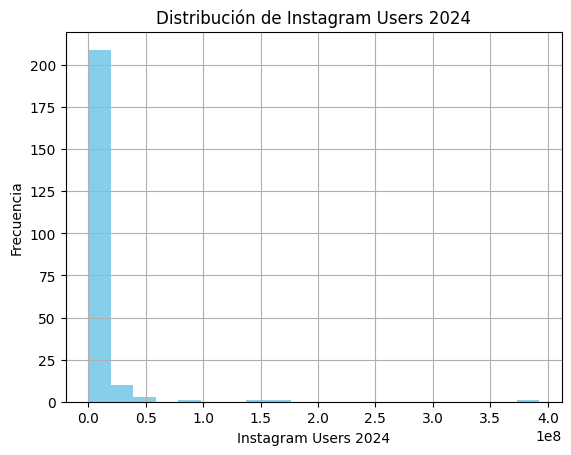

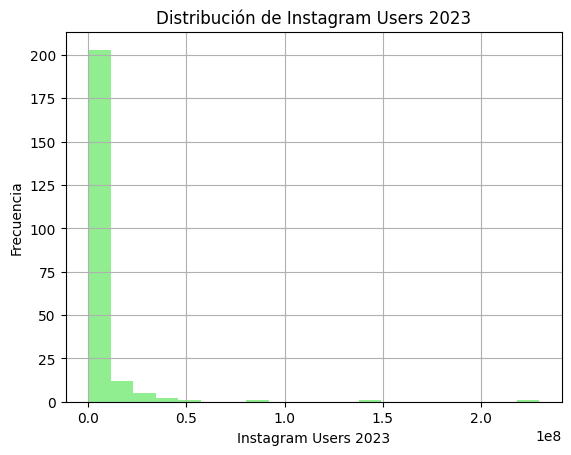

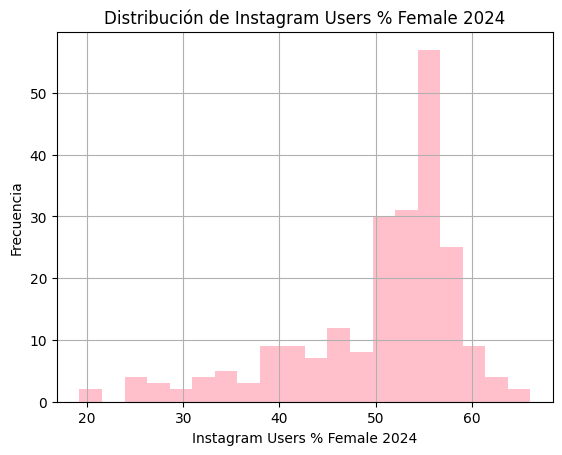

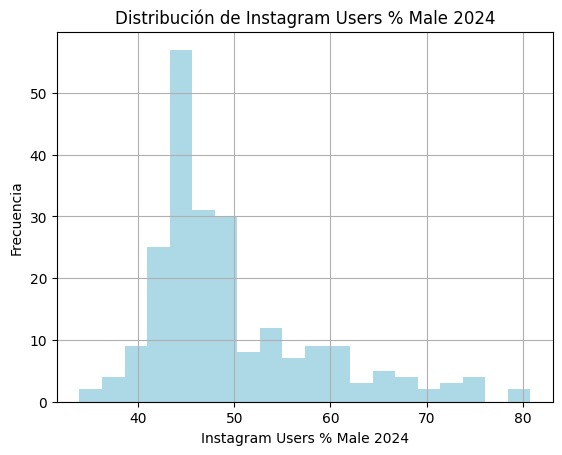

In [13]:
# Analizar value_counts de las variables categóricas
df["country"].value_counts()

# Histograma para Instagram Users 2024
df["InstagramUsers_2024"].hist(bins=20, color="skyblue")
plt.title("Distribución de Instagram Users 2024")
plt.xlabel("Instagram Users 2024")
plt.ylabel("Frecuencia")
plt.show()

# Histograma para Instagram Users 2023
df["InstagramUsers2023"].hist(bins=20, color="lightgreen")
plt.title("Distribución de Instagram Users 2023")
plt.xlabel("Instagram Users 2023")
plt.ylabel("Frecuencia")
plt.show()

# Histograma para Instagram Users % Female 2024
df["InstagramUsers_PctFemale_2024"].hist(bins=20, color="pink")
plt.title("Distribución de Instagram Users % Female 2024")
plt.xlabel("Instagram Users % Female 2024")
plt.ylabel("Frecuencia")
plt.show()

# Histograma para Instagram Users % Male 2024
df["InstagramUsers_PctMale_2024"].hist(bins=20, color="lightblue")
plt.title("Distribución de Instagram Users % Male 2024")
plt.xlabel("Instagram Users % Male 2024")
plt.ylabel("Frecuencia")
plt.show()


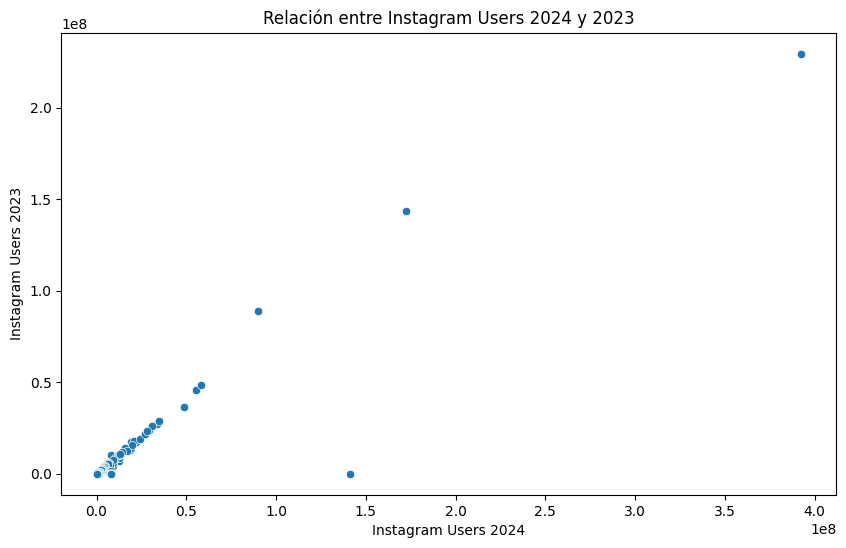

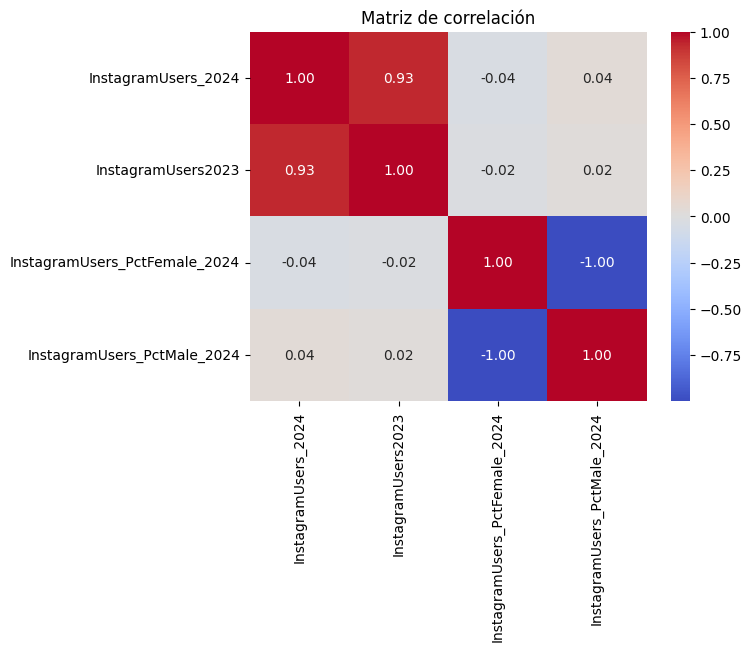

In [14]:
# Gráfico de dispersión entre Instagram Users 2024 y 2023
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["InstagramUsers_2024"], y=df["InstagramUsers2023"])
plt.title("Relación entre Instagram Users 2024 y 2023")
plt.xlabel("Instagram Users 2024")
plt.ylabel("Instagram Users 2023")
plt.show()

# Matriz de correlación entre las variables numéricas
corr = df[["InstagramUsers_2024", "InstagramUsers2023", "InstagramUsers_PctFemale_2024", "InstagramUsers_PctMale_2024"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


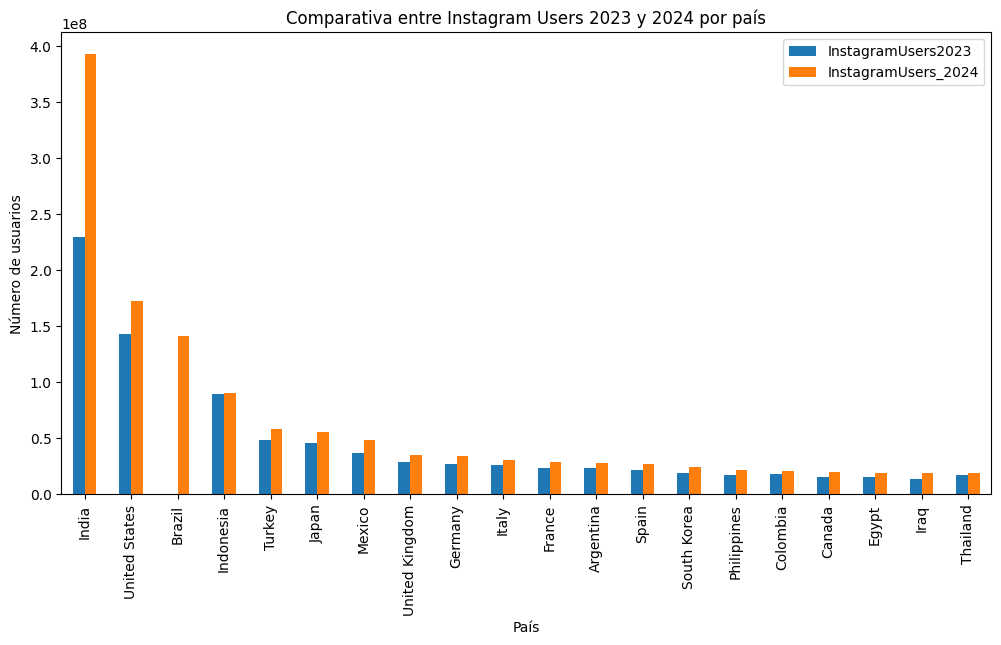

In [15]:
# Ordenar por el número de usuarios en 2024 y seleccionar los 20 países con más usuarios
df_comparison = df[["country", "InstagramUsers2023", "InstagramUsers_2024"]].sort_values(by="InstagramUsers_2024", ascending=False).head(20)
df_comparison.set_index("country", inplace=True)

# Visualizar la comparación
ax = df_comparison.plot(kind="bar", figsize=(12, 6))

# Títulos y etiquetas
plt.title("Comparativa entre Instagram Users 2023 y 2024 por país")

# Etiquetas de los ejes
plt.xlabel("País")
plt.ylabel("Número de usuarios")

# Rotar los nombres de los países en el eje X para que sean legibles
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


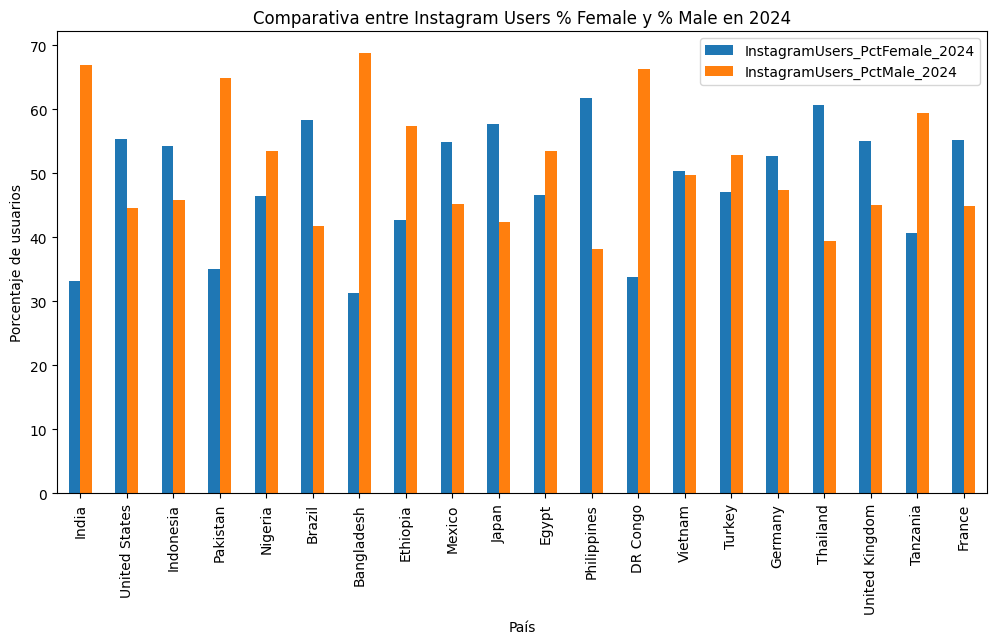

In [16]:
# Comparativa entre el porcentaje de mujeres y hombres (los primeros 20 países)
df_comparison = df[["country", "InstagramUsers_PctFemale_2024", "InstagramUsers_PctMale_2024"]].head(20)
df_comparison.set_index("country", inplace=True)

# Visualizar la comparación
ax = df_comparison.plot(kind="bar", figsize=(12, 6))

# Títulos y etiquetas
plt.title("Comparativa entre Instagram Users % Female y % Male en 2024")
plt.xlabel("País")
plt.ylabel("Porcentaje de usuarios")

# Rotar los nombres de los países en el eje X para que sean legibles
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


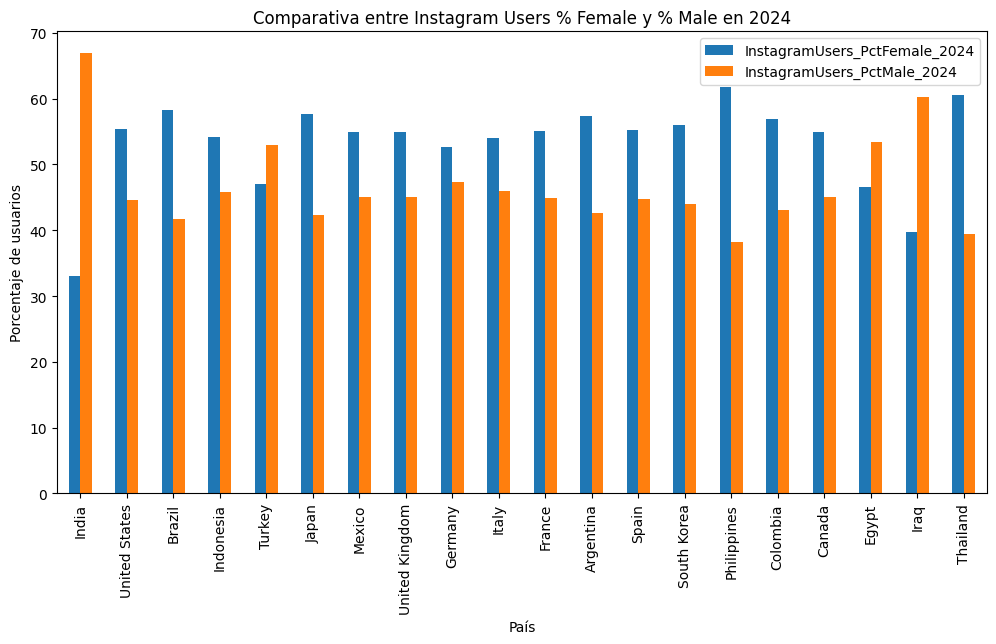

In [17]:
# Seleccionar las columnas necesarias
df_comparison = df[["country", "InstagramUsers_PctFemale_2024", "InstagramUsers_PctMale_2024", "InstagramUsers_2024"]]

# Asegurarse de que España esté incluido
df_spain = df_comparison[df_comparison["country"] == "Spain"]

# Ordenar por el número de usuarios en 2024 (puedes elegir "InstagramUsers2023" si prefieres comparar 2023)
df_comparison = df_comparison.sort_values(by="InstagramUsers_2024", ascending=False)

# Tomar los 19 países más grandes si España ya está incluido, o agregar España si no lo está
top_19 = df_comparison.head(19)
if df_spain.empty:
    df_comparison = pd.concat([df_spain, top_19])  # Agregar España a los 19 países con más usuarios
else:
    df_comparison = df_comparison.head(20)  # Tomar los primeros 20 países, España estará incluido si es necesario

# Establecer el índice en "country" para facilitar la visualización
df_comparison.set_index("country", inplace=True)

# Visualizar la comparación
ax = df_comparison[["InstagramUsers_PctFemale_2024", "InstagramUsers_PctMale_2024"]].plot(kind="bar", figsize=(12, 6))

# Títulos y etiquetas
plt.title("Comparativa entre Instagram Users % Female y % Male en 2024")
plt.xlabel("País")
plt.ylabel("Porcentaje de usuarios")

# Rotar los nombres de los países en el eje X para que sean legibles
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


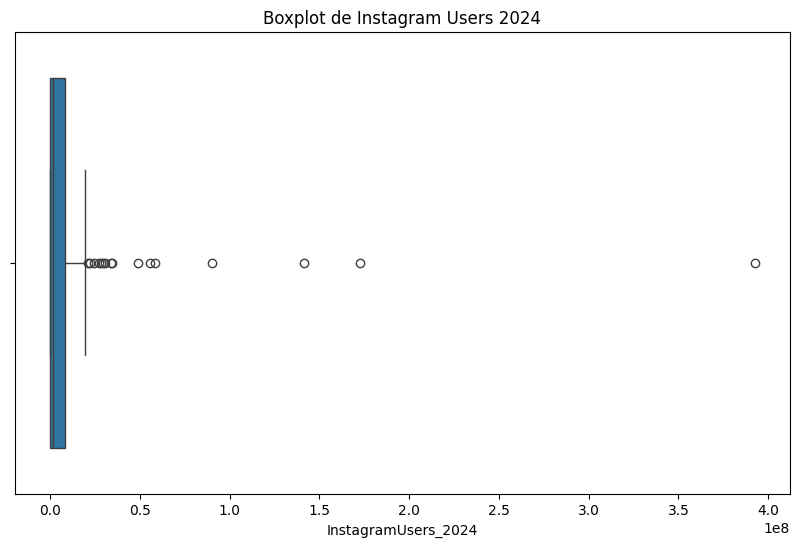

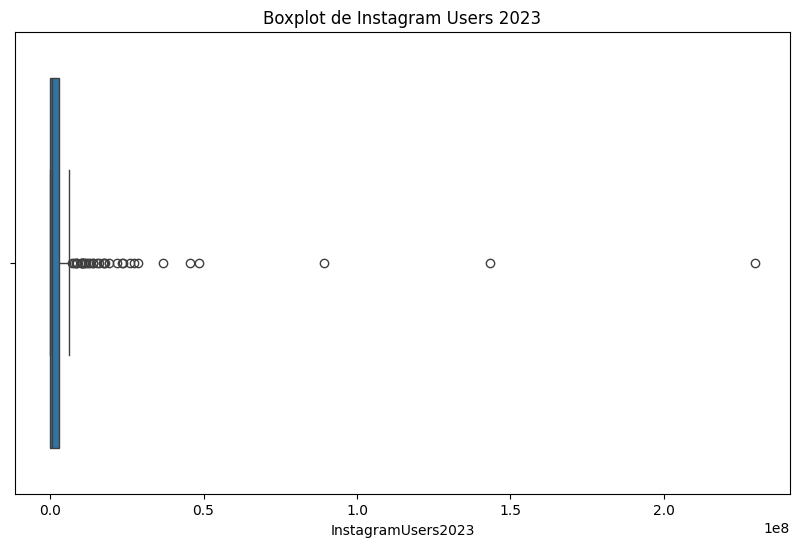

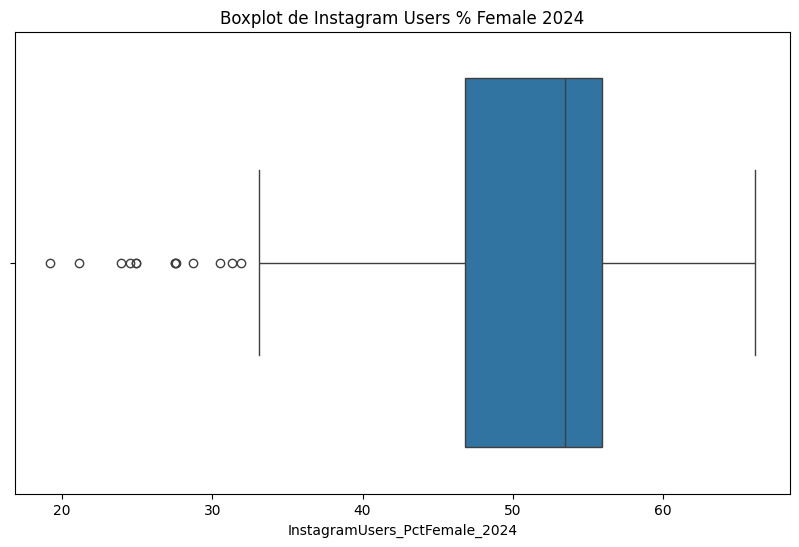

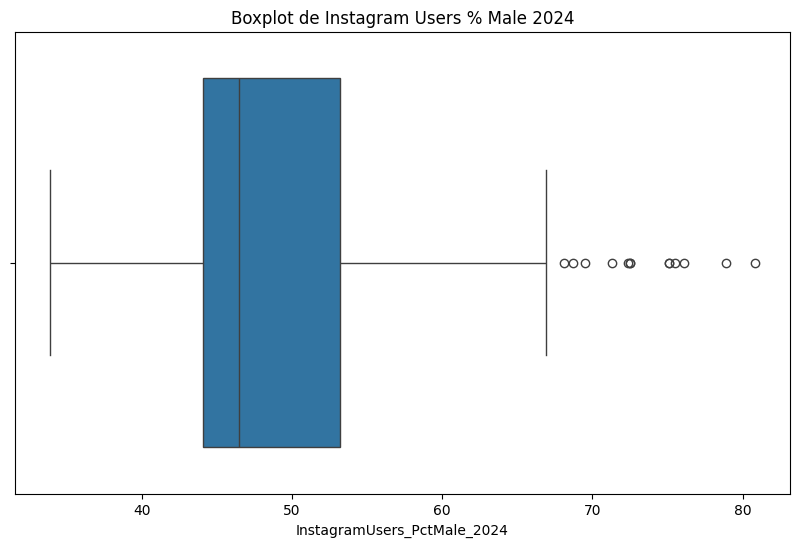

In [18]:
# Boxplot para detectar outliers en las variables numéricas
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["InstagramUsers_2024"])
plt.title("Boxplot de Instagram Users 2024")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df["InstagramUsers2023"])
plt.title("Boxplot de Instagram Users 2023")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df["InstagramUsers_PctFemale_2024"])
plt.title("Boxplot de Instagram Users % Female 2024")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df["InstagramUsers_PctMale_2024"])
plt.title("Boxplot de Instagram Users % Male 2024")
plt.show()


In [19]:
# Crear variables dummies para la columna "country"
df_dummies = pd.get_dummies(df, columns=["country"], drop_first=True)

# Ver las primeras filas después de la transformación
df_dummies.head()

,InstagramUsers_2024,InstagramUsers_PctFemale_2024,InstagramUsers_PctMale_2024,InstagramUsers2023,country_Albania,country_Algeria,country_American Samoa,country_Andorra,country_Angola,country_Anguilla,...,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Wallis and Futuna,country_Western Sahara,country_Yemen,country_Zambia,country_Zimbabwe
0,392465000.0,33.1,66.9,229600000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,172606200.0,55.4,44.6,143400000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,90183200.0,54.2,45.8,89150000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,18593301.0,35.1,64.9,12950000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,12635900.0,46.5,53.5,7100000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
# Seleccionar variables independientes (X) y dependientes (y)
X = df_dummies.drop(columns=["InstagramUsers_2024"])
y = df_dummies["InstagramUsers_2024"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)

# Evaluación del modelo
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'MAE (Regresión Lineal): {mae_lr}')
print(f'MSE (Regresión Lineal): {mse_lr}')
print(f'R2 (Regresión Lineal): {r2_lr}')

MAE (Regresión Lineal): 3872291.274124409
MSE (Regresión Lineal): 21302999467279.99
R2 (Regresión Lineal): 0.810756190509714


In [22]:
# Modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)

# Evaluación del modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'MAE (Random Forest): {mae_rf}')
print(f'MSE (Random Forest): {mse_rf}')
print(f'R2 (Random Forest): {r2_rf}')

MAE (Random Forest): 689792.013182397
MSE (Random Forest): 3499317530358.178
R2 (Random Forest): 0.9689140404346227


In [23]:
# Modelo SVR (Support Vector Regressor)
svr = SVR(kernel="rbf")
svr.fit(X_train_scaled, y_train)

# Predicciones
y_pred_svr = svr.predict(X_test_scaled)

# Evaluación del modelo
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'MAE (SVR): {mae_svr}')
print(f'MSE (SVR): {mse_svr}')
print(f'R2 (SVR): {r2_svr}')

MAE (SVR): 5341481.595777391
MSE (SVR): 126927444491995.4
R2 (SVR): -0.1275516934329144


In [24]:
# Modelo Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)

# Predicciones
y_pred_gb = gb.predict(X_test_scaled)

# Evaluación del modelo
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'MAE (Gradient Boosting): {mae_gb}')
print(f'MSE (Gradient Boosting): {mse_gb}')
print(f'R2 (Gradient Boosting): {r2_gb}')

MAE (Gradient Boosting): 780594.6207085418
MSE (Gradient Boosting): 2999230270331.0693
R2 (Gradient Boosting): 0.9733565330662564


In [25]:
# Modelo K-Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predicciones
y_pred_knn = knn.predict(X_test_scaled)

# Evaluación del modelo
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'MAE (KNN): {mae_knn}')
print(f'MSE (KNN): {mse_knn}')
print(f'R2 (KNN): {r2_knn}')

MAE (KNN): 1951166.3378579002
MSE (KNN): 20590261200491.176
R2 (KNN): 0.8170877545218048


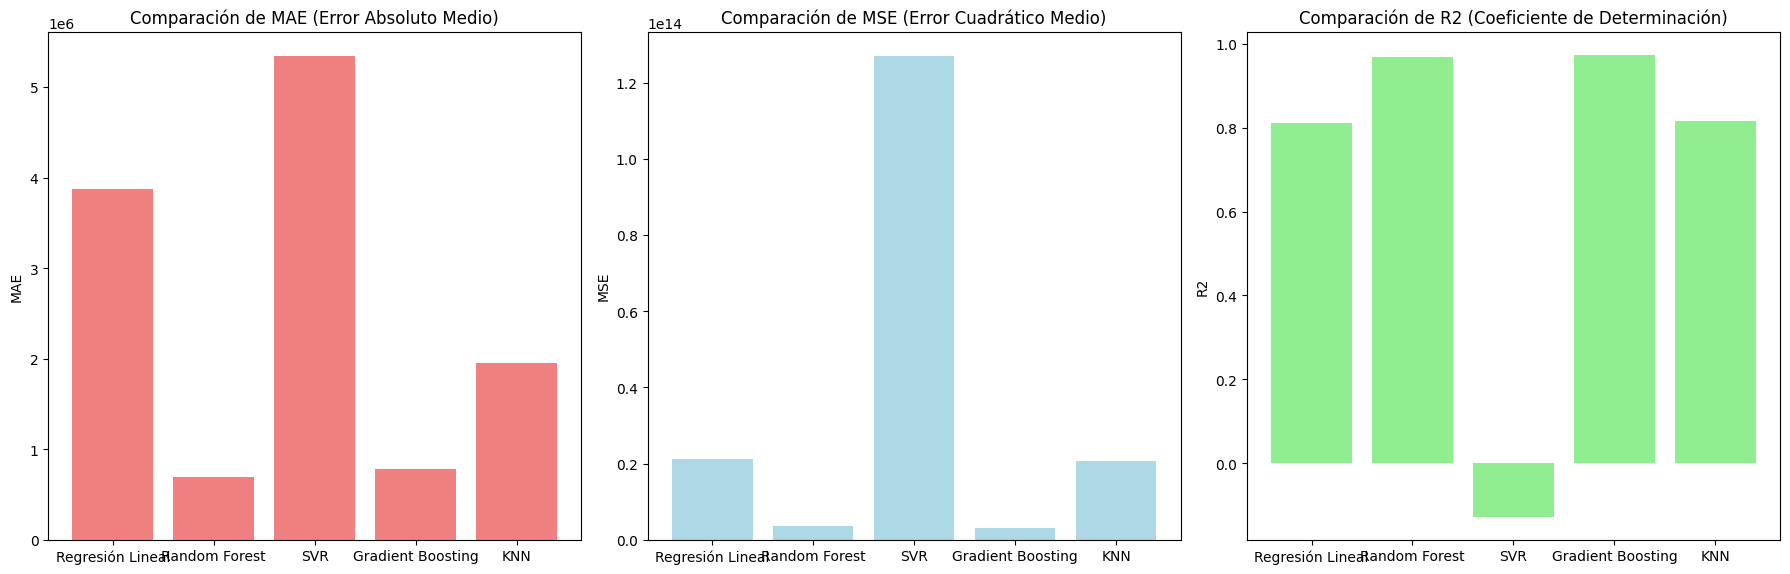

In [26]:
# Almacenar las métricas en un diccionario
metrics = {
    "Regresión Lineal": {"MAE": mae_lr, "MSE": mse_lr, "R2": r2_lr},
    "Random Forest": {"MAE": mae_rf, "MSE": mse_rf, "R2": r2_rf},
    "SVR": {"MAE": mae_svr, "MSE": mse_svr, "R2": r2_svr},
    "Gradient Boosting": {"MAE": mae_gb, "MSE": mse_gb, "R2": r2_gb},
    "KNN": {"MAE": mae_knn, "MSE": mse_knn, "R2": r2_knn}
}

# Visualizar las métricas para comparar
models = list(metrics.keys())
maes = [metrics[model]["MAE"] for model in models]
mses = [metrics[model]["MSE"] for model in models]
r2s = [metrics[model]["R2"] for model in models]

# Crear gráficos comparativos
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico MAE
axs[0].bar(models, maes, color="lightcoral")
axs[0].set_title("Comparación de MAE (Error Absoluto Medio)")
axs[0].set_ylabel("MAE")

# Gráfico MSE
axs[1].bar(models, mses, color="lightblue")
axs[1].set_title("Comparación de MSE (Error Cuadrático Medio)")
axs[1].set_ylabel("MSE")

# Gráfico R2
axs[2].bar(models, r2s, color="lightgreen")
axs[2].set_title("Comparación de R2 (Coeficiente de Determinación)")
axs[2].set_ylabel("R2")

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [27]:
df.to_csv("Insta_limpio.csv", index=False)

Este trabajo consiste en un análisis completo de datos sobre usuarios de Instagram por país en 2024. A continuación, te hago un resumen de las actividades realizadas para estructurar el proyecto:

Carga y exploración de datos:

Se importaron librerías esenciales para análisis de datos y modelado predictivo, como numpy, pandas, matplotlib, seaborn, y diversas herramientas de sklearn.
El dataset fue cargado desde un archivo CSV que contiene información sobre usuarios de Instagram por país, con columnas de usuarios en 2024 y 2023, porcentaje de usuarios femeninos y masculinos, entre otros.
Se inspeccionaron las primeras filas del dataframe, la estructura de los datos y se verificaron los valores nulos.
Limpieza y preparación de los datos:

Se eliminaron filas con valores nulos y se reemplazaron los valores nulos de algunas columnas con la media correspondiente.
Se analizaron las distribuciones de varias variables (número de usuarios en 2024, porcentaje de mujeres y hombres) mediante histogramas.
Se realizaron gráficos de dispersión y una matriz de correlación para analizar las relaciones entre las variables numéricas.
Análisis visual:

Se compararon los 20 países con más usuarios de Instagram en 2024, mostrando la distribución de usuarios por país en 2023 y 2024.
Se visualizó la distribución porcentual de usuarios femeninos y masculinos en esos países.
Se creó un boxplot para detectar posibles valores atípicos en las variables numéricas.
Transformación de variables y modelado predictivo:

Se generaron variables dummies para la columna 'country', convirtiendo las categorías de los países en variables binarias.
Se seleccionaron variables independientes (X) y la variable dependiente (y), que es el número de usuarios de Instagram en 2024.
Se dividió el dataset en conjuntos de entrenamiento y prueba, y se estandarizaron las variables numéricas.
Entrenamiento de modelos de regresión:

Se entrenaron y evaluaron varios modelos predictivos para predecir el número de usuarios en Instagram en 2024, incluyendo:
Regresión lineal.
Random Forest.
Support Vector Regressor (SVR).
Gradient Boosting Regressor.
K-Nearest Neighbors (KNN).
Se evaluaron los modelos utilizando métricas como el error absoluto medio (MAE), el error cuadrático medio (MSE) y el coeficiente de determinación (R2).
Comparación de modelos:

Se compararon los resultados de las métricas (MAE, MSE, R2) para cada modelo de manera visual, mostrando cuál de los modelos tiene un mejor desempeño en términos de precisión y ajuste.
Este proyecto combina técnicas de análisis exploratorio de datos (EDA) y modelado predictivo, utilizando herramientas de machine learning para prever la cantidad de usuarios de Instagram en el futuro, basándose en datos históricos y otras características demográficas.